## Rete dei Trasferimenti 

Nodi: Club

Archi: Trasferimenti di giocatori

Peso degli archi: Numero di trasferimenti o valore economico totale

Analisi:
- Identificare i club "hub" nel mercato
- Analizzare i pattern di trasferimento tra leghe
- Studiare la centralità dei club nel mercato

In [31]:
# Importiamo le librerie necessarie
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# Configuriamo lo stile grafico
plt.style.use("seaborn-v0_8")

# STEP 1: CARICAMENTO DEI FILE CSV
# Carichiamo i file necessari
transfers = pd.read_csv("../Datasets/SNA/transfers.csv")
clubs = pd.read_csv("../Datasets/SNA/clubs.csv")

# Esplorazione iniziale
print("Prime righe del file transfers.csv:")
display(transfers.head())

print("\nPrime righe del file clubs.csv:")
display(clubs.head())

Prime righe del file transfers.csv:


,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
1,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
2,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,15000000.0,Boulaye Dia
3,1047109,2026-06-30,25/26,2672,265,APO Levadiakos,Panathinaikos,0.0,200000.0,Georgios Katris
4,302215,2025-12-31,25/26,279,86,Ferencváros,Werder Bremen,0.0,1000000.0,Naby Keïta



Prime righe del file clubs.csv:


,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,31,26.4,16,51.6,7,Tüpraş Stadyumu,42445,€-18.65m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,26,26.4,19,73.1,18,Olimpico di Roma,70634,€-65.60m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,27,25.5,18,66.7,17,Tottenham Hotspur Stadium,62850,€-93.55m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [10]:
print("Prime righe del dataset:")
print(clubs.head())

Prime righe del dataset:
   club_id          club_code                             name  \
0      105    sv-darmstadt-98                  SV Darmstadt 98   
1    11127  ural-ekaterinburg               Ural Yekaterinburg   
2      114  besiktas-istanbul        Beşiktaş Jimnastik Kulübü   
3       12             as-rom       Associazione Sportiva Roma   
4      148  tottenham-hotspur  Tottenham Hotspur Football Club   

  domestic_competition_id  total_market_value  squad_size  average_age  \
0                      L1                 NaN          27         25.6   
1                     RU1                 NaN          30         26.5   
2                     TR1                 NaN          31         26.4   
3                     IT1                 NaN          26         26.4   
4                     GB1                 NaN          27         25.5   

   foreigners_number  foreigners_percentage  national_team_players  \
0                 13                   48.1                    

In [11]:
# Informazioni sulle colonne
print("\nInformazioni sulle colonne:")
print(players.info())


Informazioni sulle colonne:


NameError: name 'players' is not defined

In [12]:
print("Prime righe del dataset:")
print(transfers.head())

Prime righe del dataset:
   player_id transfer_date transfer_season  from_club_id  to_club_id  \
0     195778    2026-06-30           25/26            79          27   
1     569033    2026-06-30           25/26            39          27   
2     626913    2026-06-30           25/26           398         380   
3    1047109    2026-06-30           25/26          2672         265   
4     302215    2025-12-31           25/26           279          86   

   from_club_name   to_club_name  transfer_fee  market_value_in_eur  \
0   VfB Stuttgart  Bayern Munich           0.0           12000000.0   
1  1.FSV Mainz 05  Bayern Munich           0.0            4000000.0   
2           Lazio    Salernitana           0.0           15000000.0   
3  APO Levadiakos  Panathinaikos           0.0             200000.0   
4     Ferencváros  Werder Bremen           0.0            1000000.0   

       player_name  
0  Alexander Nübel  
1     Armindo Sieb  
2      Boulaye Dia  
3  Georgios Katris  
4       Na

In [13]:
# Informazioni sulle colonne
print("\nInformazioni sulle colonne:")
print(clubs.info())


Informazioni sulle colonne:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  439 non-null    int64  
 1   club_code                439 non-null    object 
 2   name                     439 non-null    object 
 3   domestic_competition_id  439 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               439 non-null    int64  
 6   average_age              401 non-null    float64
 7   foreigners_number        439 non-null    int64  
 8   foreigners_percentage    390 non-null    float64
 9   national_team_players    439 non-null    int64  
 10  stadium_name             439 non-null    object 
 11  stadium_seats            439 non-null    int64  
 12  net_transfer_record      439 non-null    object 
 13  coach_name               0 non-null      float64
 1

In [14]:
# Informazioni sulle colonne
print("\nInformazioni sulle colonne:")
print(players.info())


Informazioni sulle colonne:


NameError: name 'players' is not defined

In [15]:
# Informazioni sulle colonne
print("\nInformazioni sulle colonne:")
print(transfers.info())


Informazioni sulle colonne:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78120 entries, 0 to 78119
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            78120 non-null  int64  
 1   transfer_date        78120 non-null  object 
 2   transfer_season      78120 non-null  object 
 3   from_club_id         78120 non-null  int64  
 4   to_club_id           78120 non-null  int64  
 5   from_club_name       78120 non-null  object 
 6   to_club_name         78120 non-null  object 
 7   transfer_fee         50835 non-null  float64
 8   market_value_in_eur  48323 non-null  float64
 9   player_name          78120 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 6.0+ MB
None


In [16]:
# STEP 2: UNIONE DEI DATI E ARRICCHIMENTO
# Uniamo i trasferimenti con il file dei club per aggiungere informazioni sui nomi dei club e i campionati
transfers = transfers.merge(
    clubs[["club_id", "name", "domestic_competition_id"]], 
    left_on="from_club_id", 
    right_on="club_id", 
    how="left", 
    suffixes=("", "_from")
)
transfers.rename(columns={"name": "from_club_name", "domestic_competition_id": "from_league"}, inplace=True)

transfers = transfers.merge(
    clubs[["club_id", "name", "domestic_competition_id"]], 
    left_on="to_club_id", 
    right_on="club_id", 
    how="left", 
    suffixes=("", "_to")
)
transfers.rename(columns={"name": "to_club_name", "domestic_competition_id": "to_league"}, inplace=True)

# Controlliamo se ci sono valori nulli nei club
print("\nValori nulli nei nomi dei club (from_club_name, to_club_name):")
print(transfers[["from_club_name", "to_club_name"]].isnull().sum())

# Rimuoviamo righe con valori nulli nei nomi dei club
transfers_cleaned = transfers.dropna(subset=["from_club_name", "to_club_name"])

# Convertiamo i nomi dei club in stringhe per sicurezza
transfers_cleaned["from_club_name"] = transfers_cleaned["from_club_name"].astype(str)
transfers_cleaned["to_club_name"] = transfers_cleaned["to_club_name"].astype(str)

print(f"Dati dopo la pulizia: {len(transfers_cleaned)} trasferimenti validi.")



Valori nulli nei nomi dei club (from_club_name, to_club_name):
from_club_name        0
from_club_name    50392
to_club_name          0
to_club_name      42499
dtype: int64
Dati dopo la pulizia: 20231 trasferimenti validi.


In [17]:
# Prima di tutto, verifichiamo le colonne duplicate
print("Colonne nel DataFrame:")
print(transfers_cleaned.columns.tolist())

# Rimuoviamo le colonne duplicate mantenendo solo la prima occorrenza
transfers_cleaned = transfers_cleaned.loc[:,~transfers_cleaned.columns.duplicated()]

Colonne nel DataFrame:
['player_id', 'transfer_date', 'transfer_season', 'from_club_id', 'to_club_id', 'from_club_name', 'to_club_name', 'transfer_fee', 'market_value_in_eur', 'player_name', 'club_id', 'from_club_name', 'from_league', 'club_id_to', 'to_club_name', 'to_league']


In [18]:
# STEP 3: COSTRUZIONE DEL GRAFO
# Creiamo un grafo orientato
G = nx.DiGraph()
valid_transfers = 0
invalid_transfers = 0

for _, row in transfers_cleaned.iterrows():
    from_club = row["from_club_name"]
    to_club = row["to_club_name"]
    transfer_fee = row["transfer_fee"] if not pd.isnull(row["transfer_fee"]) else 0
    
    # Verifica che i valori non siano nulli
    if isinstance(from_club, str) and isinstance(to_club, str):
        if G.has_edge(from_club, to_club):
            G[from_club][to_club]["weight"] += 1
            G[from_club][to_club]["total_fee"] += transfer_fee
        else:
            G.add_edge(from_club, to_club, weight=1, total_fee=transfer_fee)
        valid_transfers += 1
    else:
        invalid_transfers += 1

print(f"\nStatistiche:")
print(f"Trasferimenti validi processati: {valid_transfers}")
print(f"Trasferimenti non validi: {invalid_transfers}")
print(f"Numero di nodi (club): {G.number_of_nodes()}")
print(f"Numero di archi (trasferimenti): {G.number_of_edges()}")


Statistiche:
Trasferimenti validi processati: 20231
Trasferimenti non validi: 0
Numero di nodi (club): 487
Numero di archi (trasferimenti): 12774


In [19]:
# STEP 4: METRICHE DELLA RETE
# Calcoliamo metriche di base
print("\nCalcoliamo le metriche di base:")
density = nx.density(G)
print(f"Densità della rete: {density:.4f}")

# Degree centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 club per degree centrality:")
for club, centrality in sorted_degree:
    print(f"{club}: {centrality:.4f}")


Calcoliamo le metriche di base:
Densità della rete: 0.0540

Top 10 club per degree centrality:
Benfica: 0.4136
Chelsea: 0.3765
Inter: 0.3601
Olympiacos: 0.3292
Galatasaray: 0.3272
AS Roma: 0.3272
Man City: 0.3210
Sporting CP: 0.3189
Monaco: 0.3107
RSC Anderlecht: 0.3066


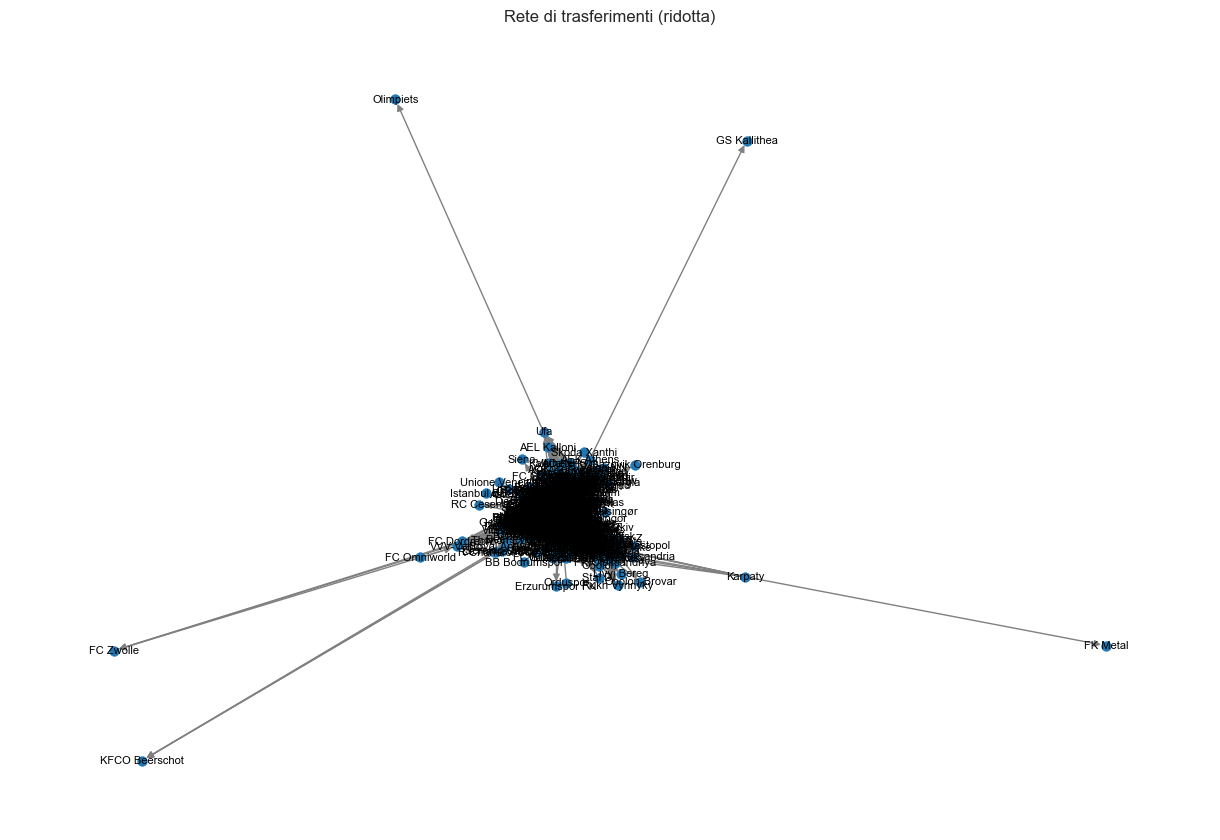

In [20]:
# STEP 5: VISUALIZZAZIONE DEL GRAFO(ridotta per chiarezza)
plt.figure(figsize=(12, 8))
small_graph = G.subgraph(list(G.nodes)[:])  # Prendiamo un sottoinsieme per la visualizzazione
pos = nx.spring_layout(small_graph, seed=42)
nx.draw(small_graph, pos, with_labels=True, node_size=50, font_size=8, edge_color="gray")
plt.title("Rete di trasferimenti (ridotta)")
plt.show()

In [21]:
# 1. Analisi della centralità
def analizza_centralita(G):
    # Calcolo delle diverse misure di centralità
    degree_centrality = nx.degree_centrality(G)
    in_degree_centrality = nx.in_degree_centrality(G)
    out_degree_centrality = nx.out_degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    
    # Creiamo un DataFrame con tutte le metriche
    centrality_df = pd.DataFrame({
        'Club': list(degree_centrality.keys()),
        'Degree': list(degree_centrality.values()),
        'In_Degree': list(in_degree_centrality.values()),
        'Out_Degree': list(out_degree_centrality.values()),
        'Betweenness': list(betweenness_centrality.values())
    })
    
    return centrality_df.sort_values('Degree', ascending=False)

In [28]:
# 2. Analisi dei pattern tra leghe
def analizza_pattern_leghe(transfers_df, clubs_df):
    # Prima merge per il club di origine
    transfers_with_leagues = transfers_df.merge(
        clubs_df[['club_id', 'domestic_competition_id']], 
        left_on='from_club_id', 
        right_on='club_id',
        how='left'
    ).rename(columns={'domestic_competition_id': 'domestic_competition_id_from'})
    
    # Seconda merge per il club di destinazione
    transfers_with_leagues = transfers_with_leagues.merge(
        clubs_df[['club_id', 'domestic_competition_id']], 
        left_on='to_club_id', 
        right_on='club_id',
        how='left',
        suffixes=('', '_to')
    ).rename(columns={'domestic_competition_id': 'domestic_competition_id_to'})
    
    # Creiamo una matrice di adiacenza tra leghe
    league_matrix = pd.crosstab(
        transfers_with_leagues['domestic_competition_id_from'],
        transfers_with_leagues['domestic_competition_id_to']
    )
    
    # Aggiungiamo totali per riga e colonna
    league_matrix['Totale_Uscite'] = league_matrix.sum(axis=1)
    league_matrix.loc['Totale_Entrate'] = league_matrix.sum()
    
    return league_matrix

In [23]:
# 3. Identificazione degli hub principali
def identifica_hub(centrality_df, n_top=10):
    print("\nTop {} club per centralità totale:".format(n_top))
    print(centrality_df.head(n_top)[['Club', 'Degree']])
    
    print("\nTop {} club per acquisti (In-Degree):".format(n_top))
    print(centrality_df.nlargest(n_top, 'In_Degree')[['Club', 'In_Degree']])
    
    print("\nTop {} club per vendite (Out-Degree):".format(n_top))
    print(centrality_df.nlargest(n_top, 'Out_Degree')[['Club', 'Out_Degree']])


In [24]:
# 4. Visualizzazione della rete
def visualizza_rete(G, centrality_df, n_top=20):
    plt.figure(figsize=(15, 15))
    
    # Prendiamo solo i nodi più centrali per una visualizzazione più chiara
    top_clubs = centrality_df.head(n_top)['Club'].tolist()
    H = G.subgraph(top_clubs)
    
    # Layout e disegno
    pos = nx.spring_layout(H)
    nx.draw(H, pos, 
            node_color='lightblue',
            node_size=[v * 3000 for v in nx.degree_centrality(H).values()],
            with_labels=True,
            font_size=8)
    
    plt.title("Rete dei principali club nel mercato dei trasferimenti")
    plt.show()

In [25]:
# Esecuzione dell'analisi
centrality_df = analizza_centralita(G)

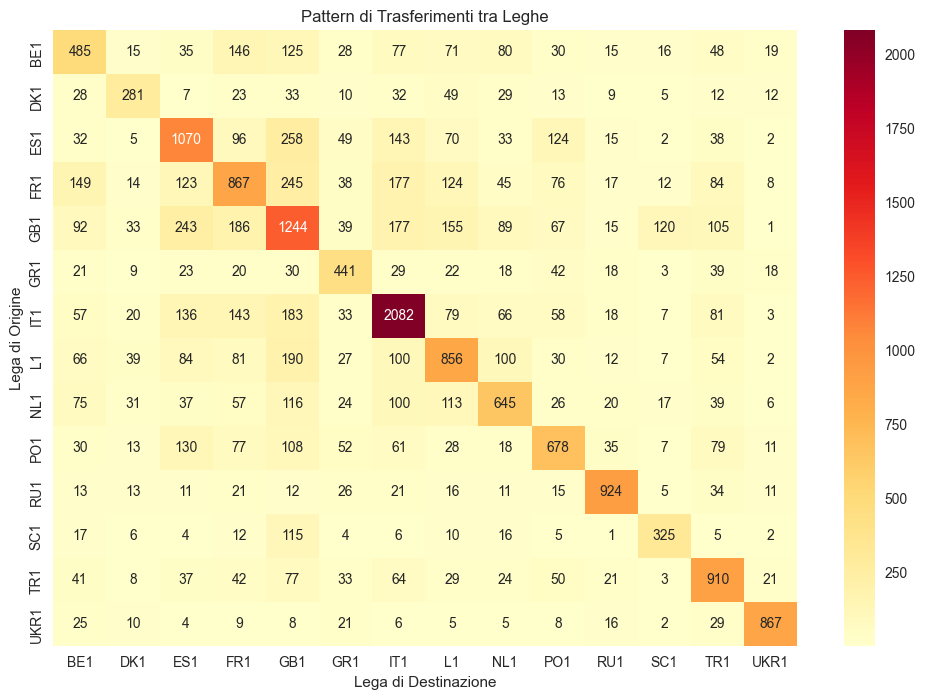


Top 5 leghe per numero di trasferimenti in uscita:
domestic_competition_id_from
Totale_Entrate    20231
IT1                2966
GB1                2566
FR1                1979
ES1                1937
Name: Totale_Uscite, dtype: int64

Top 5 leghe per numero di trasferimenti in entrata:
domestic_competition_id_to
Totale_Uscite    20231
IT1               3075
GB1               2744
ES1               1944
FR1               1780
Name: Totale_Entrate, dtype: int64


In [32]:
# Eseguiamo l'analisi
league_patterns = analizza_pattern_leghe(transfers_cleaned, clubs)

# Visualizziamo i risultati
plt.figure(figsize=(12, 8))
sns.heatmap(league_patterns.iloc[:-1, :-1], annot=True, fmt='g', cmap='YlOrRd')
plt.title('Pattern di Trasferimenti tra Leghe')
plt.xlabel('Lega di Destinazione')
plt.ylabel('Lega di Origine')
plt.show()

# Stampiamo le statistiche principali
print("\nTop 5 leghe per numero di trasferimenti in uscita:")
print(league_patterns['Totale_Uscite'].sort_values(ascending=False).head())

print("\nTop 5 leghe per numero di trasferimenti in entrata:")
print(league_patterns.loc['Totale_Entrate'].sort_values(ascending=False).head())

In [33]:
identifica_hub(centrality_df)


Top 10 club per centralità totale:
               Club    Degree
9           Benfica  0.413580
142         Chelsea  0.376543
100           Inter  0.360082
72       Olympiacos  0.329218
18      Galatasaray  0.327160
20          AS Roma  0.327160
116        Man City  0.320988
174     Sporting CP  0.318930
17           Monaco  0.310700
41   RSC Anderlecht  0.306584

Top 10 club per acquisti (In-Degree):
            Club  In_Degree
9        Benfica   0.203704
142      Chelsea   0.193416
100        Inter   0.185185
18   Galatasaray   0.179012
20       AS Roma   0.168724
72    Olympiacos   0.166667
17        Monaco   0.164609
14    Fenerbahce   0.160494
174  Sporting CP   0.158436
116     Man City   0.156379

Top 10 club per vendite (Out-Degree):
               Club  Out_Degree
9           Benfica    0.209877
142         Chelsea    0.183128
100           Inter    0.174897
116        Man City    0.164609
72       Olympiacos    0.162551
174     Sporting CP    0.160494
20          AS Roma    0

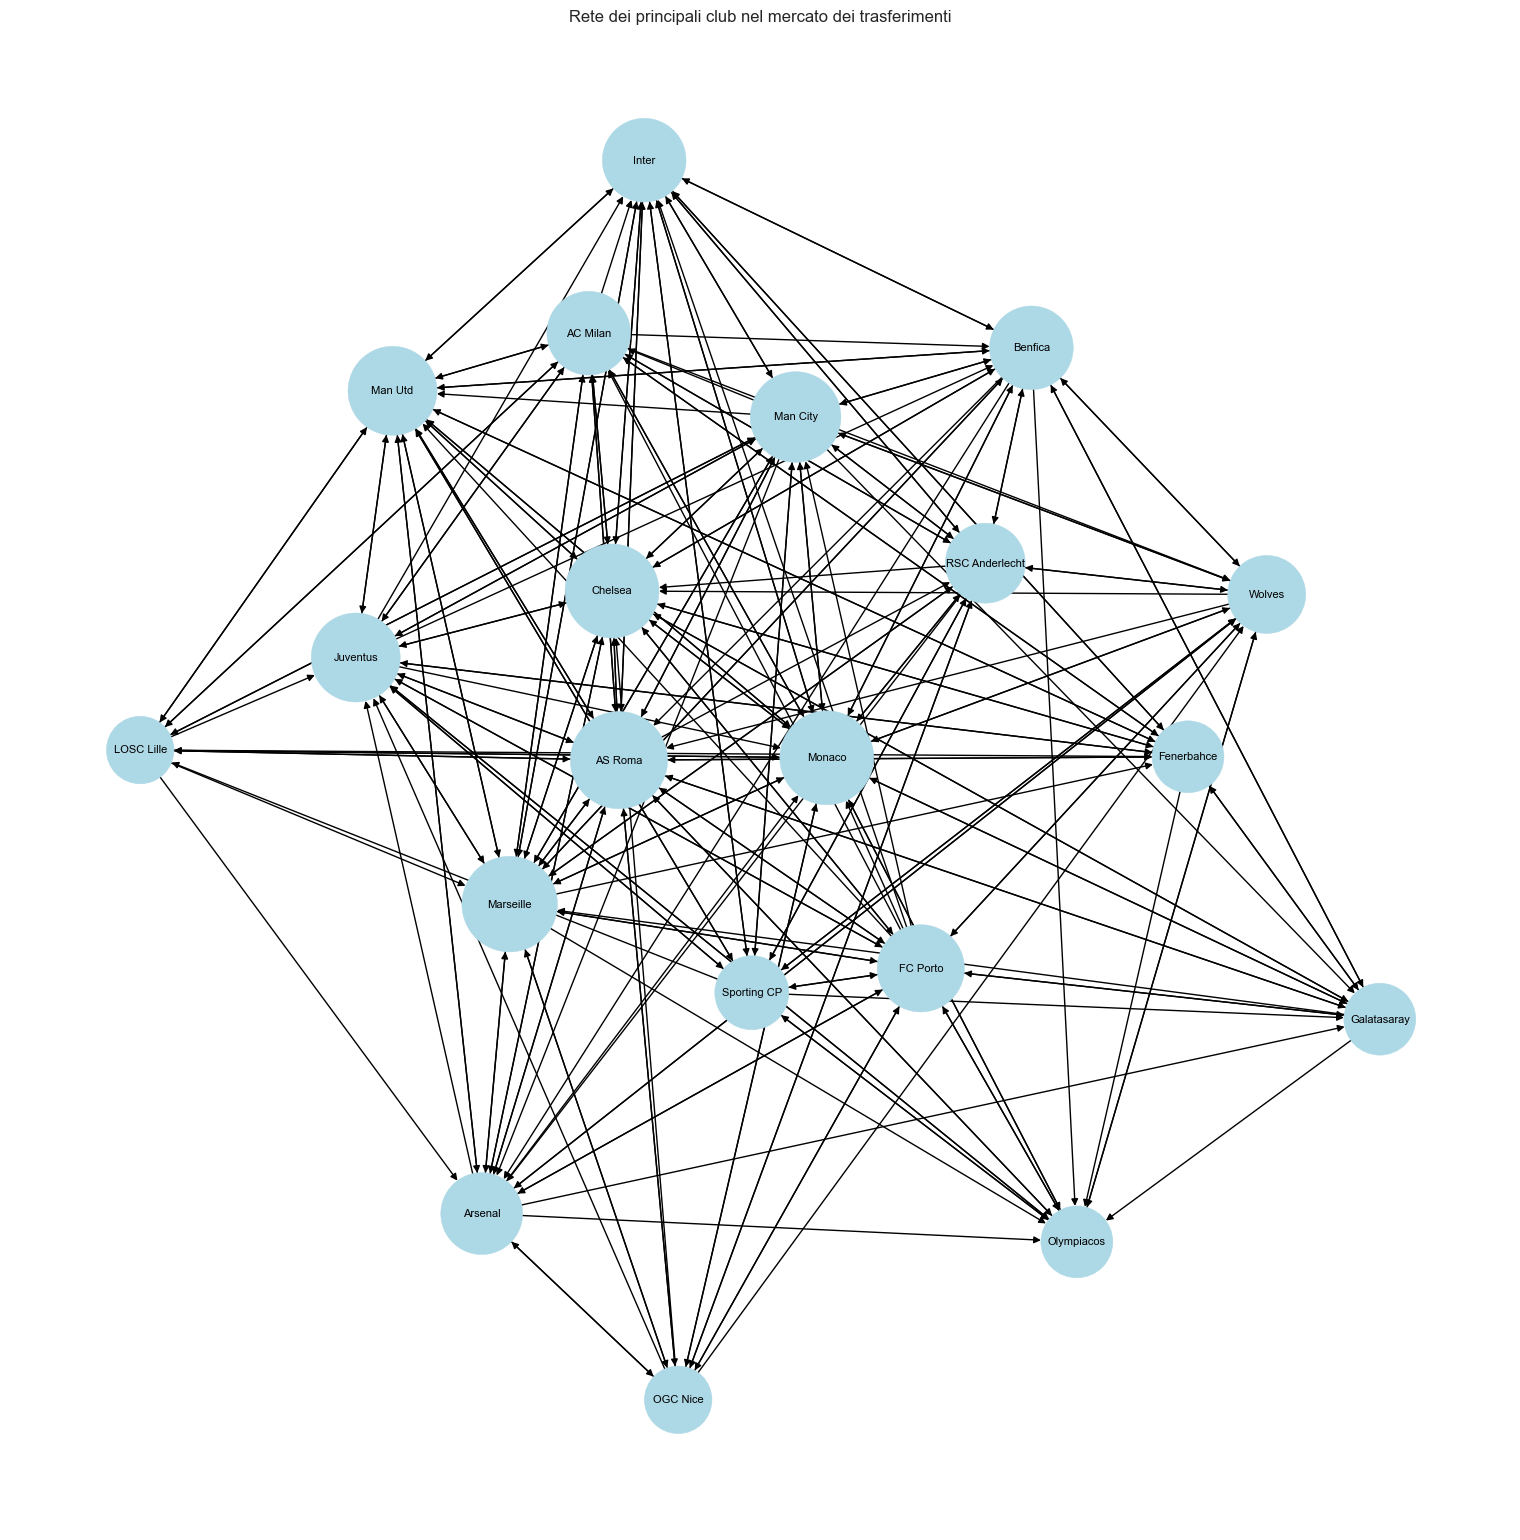

In [34]:
visualizza_rete(G, centrality_df)